In [ ]:
#This is an attempt to implement Sentiment Analysis using Python modules such as Numpy, Pandas, Scikit-Learn and NLTK.
#All the required function are being imported in the first code-block

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from sklearn.utils import shuffle

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
from nltk.metrics.scores import (precision, recall)
import collections
import nltk.metrics

In [ ]:
data = pd.read_csv('Sentiment_Reduced.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

Positive words


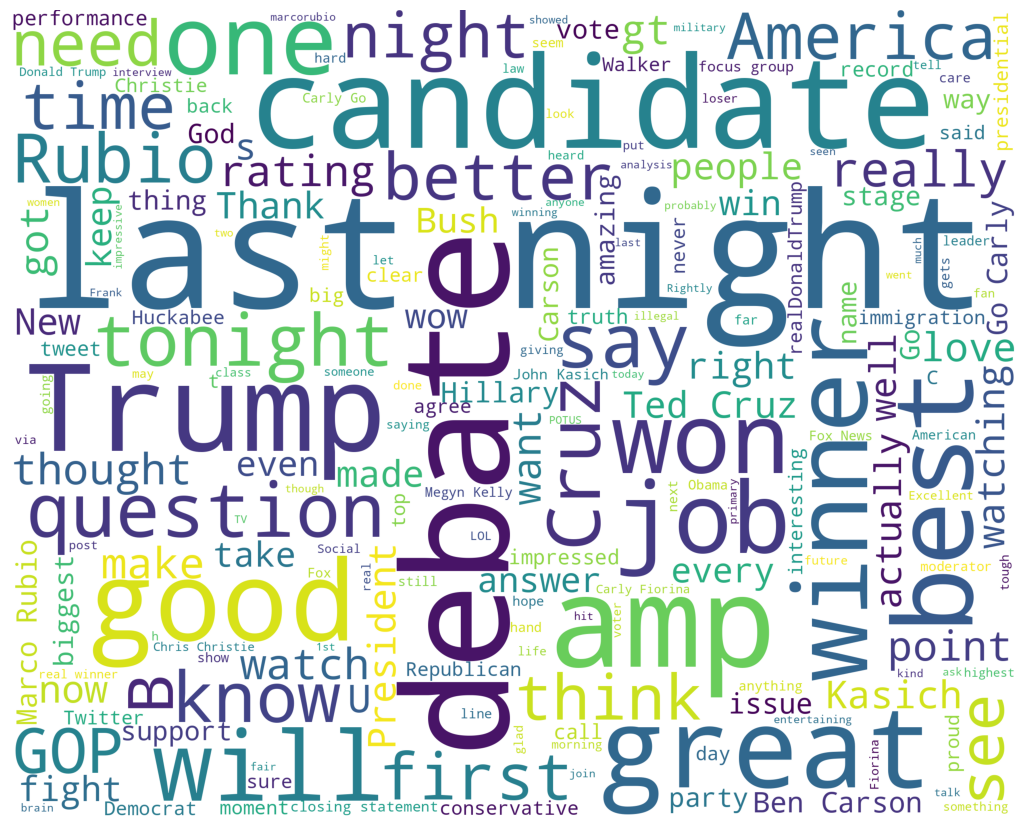

Negative words


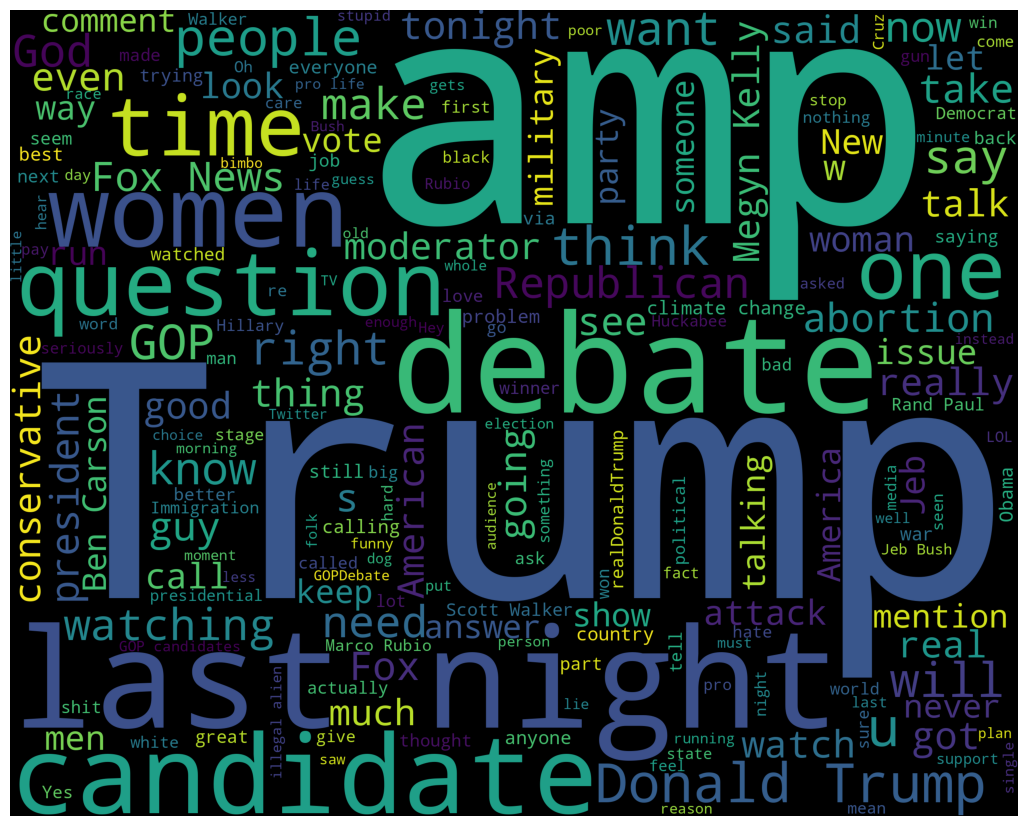

In [ ]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
import nltk
nltk.download('stopwords')
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [ ]:
#tweet division into test set and training set

tweets1=[]
tweets2=[]

for i in range(len(tweets)):
    if i<0.9*len(tweets):
        tweets1.append(tweets[i])
    else:
        tweets2.append(tweets[i])

In [ ]:
#test set and training set formation

training_set = nltk.classify.apply_features(extract_features,tweets1)
test_set = nltk.classify.apply_features(extract_features,tweets2)

In [ ]:
#This is the beginning of 7 classifier classification approach taken upon in this code
#Classifier 1 - Logistic Regression

tweet_response_neg=[]
tweet_response_pos=[]


classifier1 = SklearnClassifier(LogisticRegression())
classifier1.train(training_set)

neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res = classifier1.classify(extract_features(obj.split()))
    if (res == 'Negative'):
        neg_cnt = neg_cnt + 1
        tweet_response_neg.append(1)
    else:
        tweet_response_neg.append(0)

for obj in test_pos:
    res =  classifier1.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1
        tweet_response_pos.append(1)
    else:
        tweet_response_pos.append(0)

prob_pos1 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg1 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*neg_recall*neg_precision/(neg_recall+neg_precision)

accuracy1 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f=open("Classifier_Portfolio.txt","w+")
f.write("Twitter Sentiment Analysis Dataset")
f.write("\t"*18)
f.write("Positive Words")
f.write("\t"*18)
f.write("Negative Words")
f.write("\n")
f.write("\t"*20)
f.write("Accuracy(%)\tPrec\tRec\tFM\t\t\tPrec\tRec\tFM")
f.write("\n")
f.write("Logistic Regression")
f.write("\t"*10)

f.write(str(accuracy1))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Classifier 2 - Multinomial Naive Bayes

classifier2 = SklearnClassifier(MultinomialNB())
classifier2.train(training_set)

neg_cnt = 0
pos_cnt = 0
i,j = 0,0

for obj in test_neg:
    res =  classifier2.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
        tweet_response_neg[i] += 1
    else:
        tweet_response_neg[i] -= 1
    i += 1

for obj in test_pos:
    res =  classifier2.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1
        tweet_response_pos[j] += 1
    else:
        tweet_response_pos[j] -= 1
    j += 1

prob_pos2 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg2 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy2 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("MN_Naive_Bayes")
f.write("\t"*12)

f.write(str(accuracy2))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Classifier 3 - Bernoulli Naive Bayes

classifier3 = SklearnClassifier(BernoulliNB())
classifier3.train(training_set)

neg_cnt = 0
pos_cnt = 0
i,j = 0,0

for obj in test_neg:
    res =  classifier3.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
        tweet_response_neg[i] += 1
    else:
        tweet_response_neg[i] -= 1
    i += 1

for obj in test_pos:
    res =  classifier3.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1
        tweet_response_pos[j] += 1
    else:
        tweet_response_pos[j] -= 1
    j += 1

prob_pos3 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg3 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy3 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("Ber_Naive_Bayes")
f.write("\t"*12)

f.write(str(accuracy3))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Classifier 4 - Support Vector Classifier(SVC)

classifier4 = SklearnClassifier(SVC())
classifier4.train(training_set)

neg_cnt = 0
pos_cnt = 0
i,j=0,0

for obj in test_neg:
    res =  classifier4.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
        tweet_response_neg[i] += 1
    else:
        tweet_response_neg[i] -= 1
    i += 1

for obj in test_pos:
    res =  classifier4.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1
        tweet_response_pos[j] += 1
    else:
        tweet_response_pos[j] -= 1
    j += 1

prob_pos4 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg4 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy4 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("SVC")
f.write("\t"*18)

f.write(str(accuracy4))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Classifier 5 - Linear SVC

classifier5 = SklearnClassifier(LinearSVC())
classifier5.train(training_set)

neg_cnt = 0
pos_cnt = 0
i,j=0,0

for obj in test_neg:
    res =  classifier5.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
        tweet_response_neg[i] += 1
    else:
        tweet_response_neg[i] -= 1
    i += 1

for obj in test_pos:
    res =  classifier5.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1
        tweet_response_pos[j] += 1
    else:
        tweet_response_pos[j] -= 1
    j += 1

prob_pos5 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg5 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy5 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("LinearSVC")
f.write("\t"*15)

f.write(str(accuracy5))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Classifier 6 - Naive Bayes

classifier6 = nltk.classify.NaiveBayesClassifier.train(training_set)

neg_cnt = 0
pos_cnt = 0
i,j=0,0

for obj in test_neg:
    res =  classifier6.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
        tweet_response_neg[i] += 1
    else:
        tweet_response_neg[i] -= 1
    i += 1

for obj in test_pos:
    res =  classifier6.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1
        tweet_response_pos[j] += 1
    else:
        tweet_response_pos[j] -= 1
    j += 1

prob_pos6 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg6 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy6 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("Naive_Bayes")
f.write("\t"*15)

f.write(str(accuracy6))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Classifier 7 - Stochastic Gradient Descent Classifier

classifier7 = SklearnClassifier(SGDClassifier())
classifier7.train(training_set)

neg_cnt = 0
pos_cnt = 0
i,j=0,0

for obj in test_neg:
    res =  classifier7.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
        tweet_response_neg[i] += 1
    else:
        tweet_response_neg[i] -= 1
    i += 1

for obj in test_pos:
    res =  classifier7.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1
        tweet_response_pos[j] += 1
    else:
        tweet_response_pos[j] -= 1
    j += 1

prob_pos7 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg7 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy7 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("SGD_Classifier")
f.write("\t"*15)

f.write(str(accuracy7))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Classifier 8 - Majority Vote Classifier

neg_cnt=0
pos_cnt=0

for i in tweet_response_neg:
    if i>0:
      neg_cnt += 1

for i in tweet_response_pos:
    if i>0:
      pos_cnt += 1

prob_pos8 = pos_cnt/(pos_cnt + neg_cnt)
prob_neg8 = neg_cnt/(pos_cnt + neg_cnt)

pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy8 = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("Majority Vote")
f.write("\t"*15)

f.write(str(accuracy8))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
#Ensemble Implementation using Weighted Probability Measure

sum = accuracy1+accuracy2+accuracy3+accuracy4+accuracy5+accuracy6+accuracy7

w1 = accuracy1/sum
w2 = accuracy2/sum
w3 = accuracy3/sum
w4 = accuracy4/sum
w5 = accuracy5/sum
w6 = accuracy6/sum
w7 = accuracy7/sum
w8 = accuracy8/sum

weights = [w1, w2, w3, w4, w5, w6, w7, w8]
prob_array = [prob_pos1, prob_pos2, prob_pos3, prob_pos4, prob_pos5, prob_pos6, prob_pos7, prob_pos8]
classifiers = [classifier1, classifier2, classifier3, classifier4, classifier5, classifier6, classifier7]

pos_cnt=0
neg_cnt=0

for obj in test_neg:
    pos_score=0
    neg_score=0
    for i in range(7):
        res =  classifiers[i].classify(extract_features(obj.split()))

        if(res == 'Negative'):
            neg_score += weights[i]*prob_array[i]

        elif(res == 'Positive'):
            pos_score += weights[i]*prob_array[i]

    if (pos_score<neg_score):
        neg_cnt += 1

for obj in test_pos:
    pos_score=0
    neg_score=0
    for i in range(7):
        res =  classifiers[i].classify(extract_features(obj.split()))

        if(res == 'Negative'):
            neg_score += weights[i]*prob_array[i]

        elif(res == 'Positive'):
            pos_score += weights[i]*prob_array[i]

    if (pos_score>neg_score):
        pos_cnt += 1


pos_accuracy = (pos_cnt/len(test_pos))*100
pos_recall = (len(test_pos)/(len(test_pos)+(len(test_neg)-neg_cnt)))*100
pos_precision = (len(test_pos)/(len(test_pos)+(len(test_pos)-pos_cnt)))*100
pos_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

neg_accuracy = (neg_cnt/len(test_neg))*100
neg_recall = (len(test_neg)/(len(test_neg)+(len(test_pos)-pos_cnt)))*100
neg_precision = (len(test_neg)/(len(test_neg)+(len(test_neg)-neg_cnt)))*100
neg_fmeasure = 2*pos_recall*pos_precision/(pos_recall+pos_precision)

accuracy = (len(test_pos)*pos_accuracy + len(test_neg)*neg_accuracy)/(len(test_pos) + len(test_neg))

In [ ]:
f.write("Proposed Ensemble")
f.write("\t"*15)

f.write(str(accuracy))
f.write("\t")

f.write(str(pos_precision))
f.write("\t")

f.write(str(pos_recall))
f.write("\t")

f.write(str(pos_fmeasure))
f.write("\t")

f.write(str(neg_precision))
f.write("\t")

f.write(str(neg_recall))
f.write("\t")

f.write(str(neg_fmeasure))
f.write("\n")

1

In [ ]:
f=open("Classifier_Portfolio.txt","r")